In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from drawdata import ScatterWidget

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn, optim

plt.style.use('dark_background')

<Axes: xlabel='x', ylabel='y'>

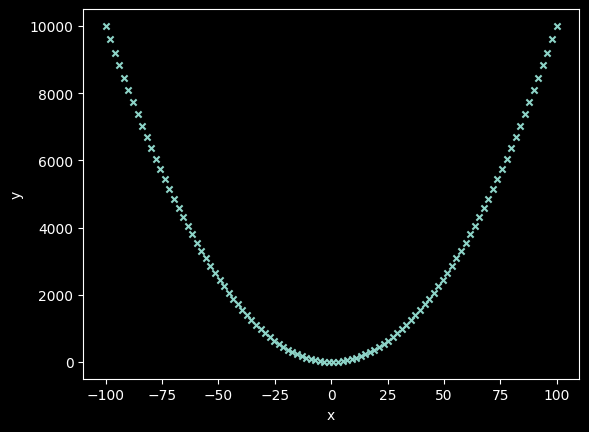

In [19]:
n = 100
x = np.linspace(-100, 100, num=n)
y = x ** 2
noise = np.random.rand(n)
y += noise

data = pd.DataFrame({
    'x': x,
    'y': y,
})

data.plot.scatter(x='x', y='y', marker='x')

In [124]:
def predict(model, X):
    model.eval()
    with torch.no_grad():
        return model(X).detach().numpy()

In [125]:
data.head()

,x,y
0,-100.000000,10000.487409
1,-97.979798,9600.419957
2,-95.959596,9208.833260
3,-93.939394,8824.985974
4,-91.919192,8449.861700


<Axes: xlabel='x', ylabel='y'>

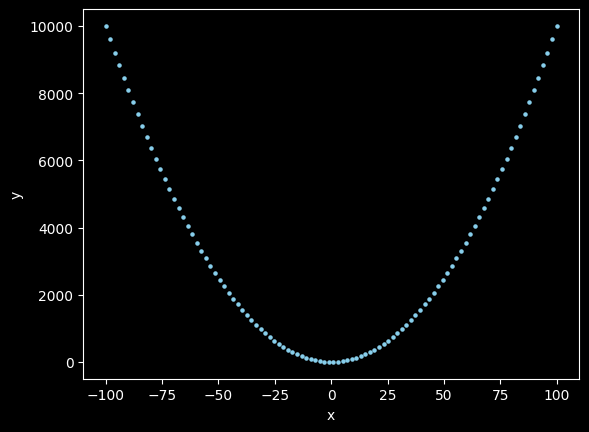

In [126]:
data.plot.scatter(x='x', y='y', marker='.', color='skyblue')

In [127]:
X = torch.tensor(data[['x']].to_numpy(), dtype=torch.float)
y = torch.tensor(data[['y']].to_numpy(), dtype=torch.float)

dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, len(dataset))

In [128]:
model = nn.Sequential(
    nn.Linear(1, 2),
    nn.Sigmoid(),
    nn.Linear(2, 1),
)


Epoch 1/1000: Loss = 6,336,022.5000
Epoch 2/1000: Loss = 6,336,022.5000
Epoch 3/1000: Loss = 6,336,022.5000
Epoch 4/1000: Loss = 6,336,022.5000
Epoch 5/1000: Loss = 6,336,022.5000
Epoch 6/1000: Loss = 6,336,022.5000
Epoch 7/1000: Loss = 6,336,022.5000
Epoch 8/1000: Loss = 6,336,022.5000
Epoch 9/1000: Loss = 6,336,022.5000
Epoch 10/1000: Loss = 6,336,022.5000
Epoch 11/1000: Loss = 6,336,022.5000
Epoch 12/1000: Loss = 6,336,022.5000
Epoch 13/1000: Loss = 6,336,022.5000
Epoch 14/1000: Loss = 6,336,022.5000
Epoch 15/1000: Loss = 6,336,022.5000
Epoch 16/1000: Loss = 6,336,022.5000
Epoch 17/1000: Loss = 6,336,022.5000
Epoch 18/1000: Loss = 6,336,022.5000
Epoch 19/1000: Loss = 6,336,022.5000
Epoch 20/1000: Loss = 6,336,022.5000
Epoch 21/1000: Loss = 6,336,022.5000
Epoch 22/1000: Loss = 6,336,022.5000
Epoch 23/1000: Loss = 6,336,022.5000
Epoch 24/1000: Loss = 6,336,022.5000
Epoch 25/1000: Loss = 6,336,022.5000
Epoch 26/1000: Loss = 6,336,022.5000
Epoch 27/1000: Loss = 6,336,022.5000
Epoch 28/1

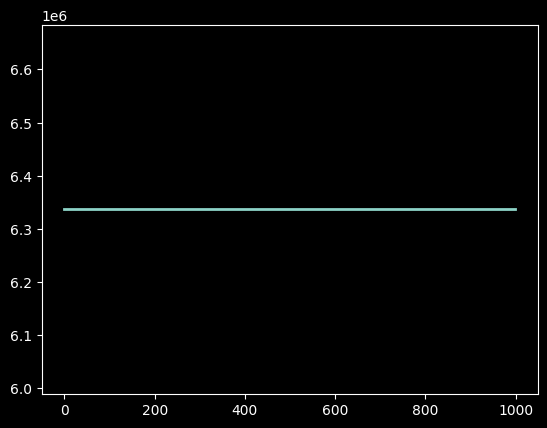

In [319]:


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00000000000001)
epochs = 1000

losses = []
for epoch in range(1, epochs + 1):
    cost = 0
    model.train()
    for x, y in dataloader:
        yhat = model(x)
        optimizer.zero_grad()
        loss = criterion(yhat, y)
        loss.backward()
        optimizer.step()
        
        cost += loss.item()
        
    cost /= len(dataloader)
    losses.append(cost)
    print(f"Epoch {epoch}/{epochs}: Loss = {cost:,.4f}")


plt.plot(losses, linewidth=2, )

6336024.810943144


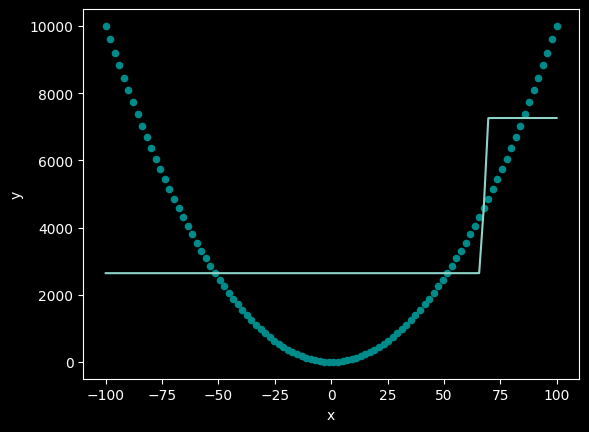

In [263]:
y_pred = predict(model, X)

print(mean_squared_error(data['y'], y_pred))

data.plot.scatter(x='x', y='y', color='darkcyan')

plt.plot(data['x'], y_pred)